# 1970년대 보스턴 지역의 주택 가격을 예측하는 회귀 문제

## 보스턴 주택가격 데이터 준비하기

In [ ]:
from keras.datasets.boston_housing import load_data

# 데이터 다운로드 (훈련셋: 80, 테스트셋:20)
(X_train, y_train), (X_test, y_test) = load_data(path = 'boston_housing.npz',
                                                 test_split=0.2, seed = 777)

## 데이터 형태 확인하기

In [ ]:
print('X_train.shape', X_train.shape)
print('y_train.shape', y_train.shape)

X_train.shape (404, 13)
y_train.shape (404,)


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train[0]

array([2.5199e-01, 0.0000e+00, 1.0590e+01, 0.0000e+00, 4.8900e-01,
       5.7830e+00, 7.2700e+01, 4.3549e+00, 4.0000e+00, 2.7700e+02,
       1.8600e+01, 3.8943e+02, 1.8060e+01])

In [ ]:
y_train #numpy.ndarray

array([22.5,  8.3, 17.2, 25. , 28.5, 23. , 18.9, 50. , 15.6, 38.7, 24.6,
       23.3,  9.5, 20. , 18.3, 36.4,  5. , 19.4, 28.1, 17.8, 19.6, 24.5,
       10.4, 23.7, 19.4, 23.9, 21.4, 29.9, 24.4, 23.1, 25. , 30.1, 22.8,
       22.8, 22. , 24.8, 15.6, 22. , 19.6, 13.1, 22.5, 18.9, 14.6, 13.3,
       17.4, 20.8, 10.8, 21.4, 17.2, 13.8, 28.7, 35.1, 10.2, 21.7, 20.5,
       25. , 21.1, 15.6, 23.6, 23.2, 28.7, 16.6, 26.2,  9.6, 18.2, 31.7,
       42.8, 16.1, 22.6, 18.1, 23.8, 11.8, 16. , 21.5, 13.9, 11.7, 44.8,
       20.1, 50. , 22.1, 20.6, 14.6, 48.8, 22.9, 14.4, 23.9, 15.6, 19.9,
       20.5,  8.7, 26.5, 20.3, 23.8, 44. , 18.5, 17.5, 22.8, 14.3, 10.9,
       36.1, 25. , 17.9, 17.7, 35.2, 20. , 24.3, 32.9, 15. , 50. , 33.8,
       21.9, 28.4, 10.2, 12. , 17.1, 17.1, 22. , 25.1, 20.9, 37.6, 15.6,
       43.5, 17.8, 20. , 15.2, 21.1, 19.9, 22.6, 14.4, 13.8, 37.3, 12.5,
       11.7, 26.6,  7.2, 18.6, 29. , 14.9, 14.2, 20.5, 19. , 50. , 27.1,
       18.4, 20.7, 29.6, 35.4, 21.7, 43.8, 22.6, 19

In [ ]:
print('X_test.shape', X_test.shape)
print('y_test.shape', y_test.shape)

X_test.shape (102, 13)
y_test.shape (102,)


In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
y_train

array([22.5,  8.3, 17.2, 25. , 28.5, 23. , 18.9, 50. , 15.6, 38.7, 24.6,
       23.3,  9.5, 20. , 18.3, 36.4,  5. , 19.4, 28.1, 17.8, 19.6, 24.5,
       10.4, 23.7, 19.4, 23.9, 21.4, 29.9, 24.4, 23.1, 25. , 30.1, 22.8,
       22.8, 22. , 24.8, 15.6, 22. , 19.6, 13.1, 22.5, 18.9, 14.6, 13.3,
       17.4, 20.8, 10.8, 21.4, 17.2, 13.8, 28.7, 35.1, 10.2, 21.7, 20.5,
       25. , 21.1, 15.6, 23.6, 23.2, 28.7, 16.6, 26.2,  9.6, 18.2, 31.7,
       42.8, 16.1, 22.6, 18.1, 23.8, 11.8, 16. , 21.5, 13.9, 11.7, 44.8,
       20.1, 50. , 22.1, 20.6, 14.6, 48.8, 22.9, 14.4, 23.9, 15.6, 19.9,
       20.5,  8.7, 26.5, 20.3, 23.8, 44. , 18.5, 17.5, 22.8, 14.3, 10.9,
       36.1, 25. , 17.9, 17.7, 35.2, 20. , 24.3, 32.9, 15. , 50. , 33.8,
       21.9, 28.4, 10.2, 12. , 17.1, 17.1, 22. , 25.1, 20.9, 37.6, 15.6,
       43.5, 17.8, 20. , 15.2, 21.1, 19.9, 22.6, 14.4, 13.8, 37.3, 12.5,
       11.7, 26.6,  7.2, 18.6, 29. , 14.9, 14.2, 20.5, 19. , 50. , 27.1,
       18.4, 20.7, 29.6, 35.4, 21.7, 43.8, 22.6, 19

## 데이터 전처리 (feature) 표준화(Standardzaion)

In [ ]:
import numpy as np

# (데이터 - 전체평균) / 표준편차
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

In [ ]:
# 전처리(X_train, X_test) 둘 다 처리
X_train = (X_train-mean)/std
X_test = (X_test-mean)/std

print(X_train[0])

[-0.40102395 -0.48033655 -0.12089418 -0.28828791 -0.58254176 -0.68137272
  0.11117586  0.26484408 -0.65187119 -0.80249043  0.0756568   0.37366783
  0.69211835]


## 검증 데이터셋 분리

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_var, y_train, y_var = train_test_split(X_train, y_train, test_size=0.33, random_state=777)

print(X_train.shape, X_var.shape)

(270, 13) (134, 13)


## 모델 구성하기

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(64, activation = 'relu', input_shape=(13,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) # activation = 'liner'

## 모델 설정하기

In [ ]:
model.compile(optimizer='adam',
              loss ='mse',
              metrics=['mae', 'mse'])

## 모델 학습하기

In [ ]:
history = model.fit(X_train, y_train, epochs=300, validation_data = (X_var, y_var))

Epoch 1/300
9/9 [==============================] - 1s 18ms/step - loss: 544.2779 - mae: 21.6028 - mse: 544.2779 - val_loss: 594.6411 - val_mae: 22.0946 - val_mse: 594.6411
Epoch 2/300
9/9 [==============================] - 0s 5ms/step - loss: 520.3958 - mae: 21.0392 - mse: 520.3958 - val_loss: 569.0352 - val_mae: 21.5112 - val_mse: 569.0352
Epoch 3/300
9/9 [==============================] - 0s 5ms/step - loss: 494.1914 - mae: 20.4082 - mse: 494.1914 - val_loss: 539.2008 - val_mae: 20.8148 - val_mse: 539.2008
Epoch 4/300
9/9 [==============================] - 0s 10ms/step - loss: 463.6421 - mae: 19.6552 - mse: 463.6421 - val_loss: 502.3601 - val_mae: 19.9387 - val_mse: 502.3601
Epoch 5/300
9/9 [==============================] - 0s 6ms/step - loss: 425.5097 - mae: 18.7079 - mse: 425.5097 - val_loss: 457.1551 - val_mae: 18.8212 - val_mse: 457.1551
Epoch 6/300
9/9 [==============================] - 0s 5ms/step - loss: 380.0081 - mae: 17.5508 - mse: 380.0081 - val_loss: 400.8521 - val_mae: 

## 모델 학습 결과 분석

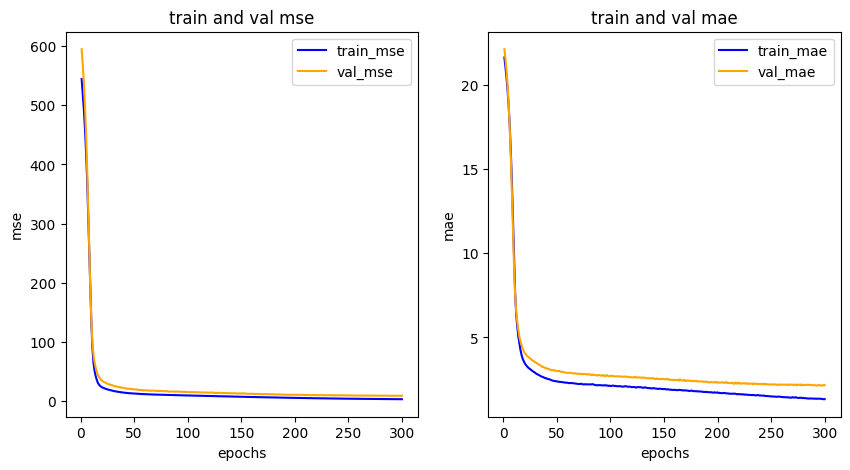

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
mse = his_dict['mse']
val_mse = his_dict['val_mse'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(mse) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, mse, color = 'blue', label = 'train_mse')
ax1.plot(epochs, val_mse, color = 'orange', label = 'val_mse')
ax1.set_title('train and val mse')
ax1.set_xlabel('epochs')
ax1.set_ylabel('mse')
ax1.legend()

mae = his_dict['mae']
val_mae = his_dict['val_mae']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, color = 'blue', label = 'train_mae')
ax2.plot(epochs, val_mae, color = 'orange', label = 'val_mae')
ax2.set_title('train and val mae')
ax2.set_xlabel('epochs')
ax2.set_ylabel('mae')
ax2.legend()

plt.show()

## 모델 평가하기

In [ ]:
model.evaluate(X_test, y_test) # 2.2 -> 실제 집값과 2,200 달러 정도 차이로 집값 예측

4/4 [==============================] - 0s 3ms/step - loss: 9.9074 - mae: 2.1823 - mse: 9.9074


[9.907391548156738, 2.182342052459717, 9.907391548156738]

## 모델 예측하고 결과 확인

4/4 [==============================] - 0s 2ms/step


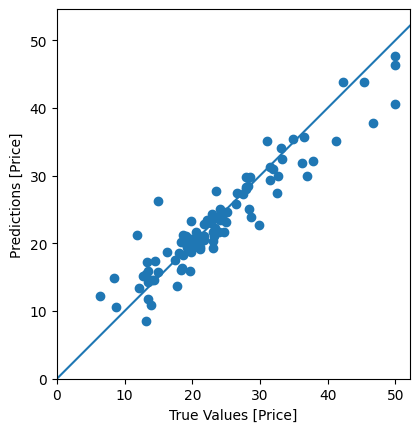

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

## K-Fold 사용하여 모델 학습하기

*   학습 데이터 부족으로 성능이 낮은 경우 적용 가능
*   검증 데이터셋을 K-Fold로 사용하여, 학습 데이터 확보



### K-Fold를 위한 데이터 준비하기

In [ ]:
from keras.datasets.boston_housing import load_data

# 데이터 다운로드 (훈련셋:80, 테스트셋:20)
(X_train, y_train), (X_test, y_test) = load_data(path='boston_housing.npz',
                                                 test_split=0.2, seed=777)

### 데이터 전처리

In [ ]:
import numpy as np

# (데이터-전체평균)/표준편차
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

# 전처리(X_train, X_test) 둘 다 처리
X_train = (X_train-mean)/std
X_teat = (X_test-mean)/std

### K-Fold를 사용한 모델 학습

In [ ]:
from sklearn.model_selection import KFold

# 3-Fold 로 나눠서 검증데이터셋 사용하여 학습
k = 3

kfold = KFold(n_splits=k)

# 재사용을 위해 모델 구성 및 설정 함수로 선언
def get_model() :
  model = Sequential()

  model.add(Dense(64, activation = 'relu', input_shape=(13,)))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(1)) # 연속적인 값 -> linear -> defalut 가 linear 함수임, activation=linear

  model.compile(optimizer='adam', loss ='mse', metrics=['mae'])

  return model

# 각 모델(KFold)의 평가 정보를 담는 리스트 선언
mae_list =[]

# K번 학습 및 평가
for train_idx, val_idx in kfold.split(X_train) :

  # 학습데이터, 검증데이터 분리
  X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
  y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

  # 모델 불러오기
  model = get_model()

  # 모델 학습하기
  model.fit(X_train_fold, y_train_fold, epochs=300, validation_data=(X_val_fold, y_val_fold))

  # 모델 평가하기
  _, test_mae = model.evaluate(X_test, y_test)
  mae_list.append(test_mae)

Epoch 1/300
9/9 [==============================] - 1s 16ms/step - loss: 543.5356 - mae: 21.4973 - val_loss: 514.6813 - val_mae: 20.8912
Epoch 2/300
9/9 [==============================] - 0s 7ms/step - loss: 508.3042 - mae: 20.6750 - val_loss: 479.1526 - val_mae: 20.0403
Epoch 3/300
9/9 [==============================] - 0s 5ms/step - loss: 469.2623 - mae: 19.7489 - val_loss: 439.7313 - val_mae: 19.0595
Epoch 4/300
9/9 [==============================] - 0s 4ms/step - loss: 424.9160 - mae: 18.6640 - val_loss: 394.7339 - val_mae: 17.8876
Epoch 5/300
9/9 [==============================] - 0s 5ms/step - loss: 374.6997 - mae: 17.3370 - val_loss: 342.5876 - val_mae: 16.4497
Epoch 6/300
9/9 [==============================] - 0s 5ms/step - loss: 316.9722 - mae: 15.7324 - val_loss: 284.1711 - val_mae: 14.6594
Epoch 7/300
9/9 [==============================] - 0s 4ms/step - loss: 254.4742 - mae: 13.8032 - val_loss: 224.1742 - val_mae: 12.5592
Epoch 8/300
9/9 [==============================] - 0s 

In [ ]:
mae_list

[2407.7265625, 1685.16162109375, 2661.78564453125]

## K-Fold 사용한 모델 성능평가

In [ ]:
np.mean(mae_list) # 2.02 -> 실제 집값과 2000달러 차이

2251.5579427083335

## 검증 데이터셋 사용하지 않고 학습한 모델 성능평가

In [ ]:
from keras.datasets.boston_housing import load_data

# 데이터 다운로드 (훈련셋:80, 테스트셋:20)
(X_train, y_train), (X_test, y_test) = load_data(path='boston_housing.npz',
                                                 test_split=0.2, seed=777)

In [ ]:
# (데이터-전체평균)/표준편차
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

# 전처리(X_train, X_test) 둘 다 처리
X_train = (X_train-mean)/std
X_teat = (X_test-mean)/std

model = Sequential()

model.add(Dense(64, activation = 'relu', input_shape=(13,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) # activation=linear

model.compile(optimizer='adam', loss ='mse', metrics=['mae'])

# 검증 데이터셋 사용하지 않고 모두 학습에 사용
model.fit(X_train, y_train, epochs=300)

model.evaluate(X_test, y_test)

Epoch 1/300
13/13 [==============================] - 0s 2ms/step - loss: 569.0139 - mae: 22.0262
Epoch 2/300
13/13 [==============================] - 0s 1ms/step - loss: 530.3778 - mae: 21.1692
Epoch 3/300
13/13 [==============================] - 0s 1ms/step - loss: 483.3785 - mae: 20.1162
Epoch 4/300
13/13 [==============================] - 0s 1ms/step - loss: 424.5645 - mae: 18.6868
Epoch 5/300
13/13 [==============================] - 0s 1ms/step - loss: 350.2896 - mae: 16.6909
Epoch 6/300
13/13 [==============================] - 0s 1ms/step - loss: 267.7659 - mae: 14.1529
Epoch 7/300
13/13 [==============================] - 0s 1ms/step - loss: 185.1611 - mae: 11.1806
Epoch 8/300
13/13 [==============================] - 0s 2ms/step - loss: 124.0889 - mae: 8.6317
Epoch 9/300
13/13 [==============================] - 0s 1ms/step - loss: 87.8118 - mae: 7.0841
Epoch 10/300
13/13 [==============================] - 0s 2ms/step - loss: 67.6559 - mae: 6.1936
Epoch 11/300
13/13 [==============

[3230953.75, 1769.342041015625]

In [ ]:
model.evaluate(X_test, y_test) # 1.9 -> 실제 집값과 1900달러 차이

4/4 [==============================] - 0s 3ms/step - loss: 3230953.7500 - mae: 1769.3420


[3230953.75, 1769.342041015625]

## 4-Fold, 5-Fold 사용한 모델의 성능 평가

### 4-Fold를 사용한 모델 성능평가

In [ ]:
from sklearn.model_selection import KFold

# 3-Fold 로 나눠서 검증데이터셋 사용하여 학습
k = 4

kfold = KFold(n_splits=k)

# 재사용을 위해 모델 구성 및 설정 함수로 선언
def get_model() :
  model = Sequential()

  model.add(Dense(64, activation = 'relu', input_shape=(13,)))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(1)) # 연속적인 값 -> linear -> defalut 가 linear 함수임, activation=linear

  model.compile(optimizer='adam', loss ='mse', metrics=['mae'])

  return model

# 각 모델(KFold)의 평가 정보를 담는 리스트 선언
mae_list =[]

# K번 학습 및 평가
for train_idx, val_idx in kfold.split(X_train) :

  # 학습데이터, 검증데이터 분리
  X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
  y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

  # 모델 불러오기
  model = get_model()

  # 모델 학습하기
  model.fit(X_train_fold, y_train_fold, epochs=300, validation_data=(X_val_fold, y_val_fold))

  # 모델 평가하기
  _, test_mae = model.evaluate(X_test, y_test)
  mae_list.append(test_mae)

Epoch 1/300
10/10 [==============================] - 1s 16ms/step - loss: 574.8801 - mae: 22.1091 - val_loss: 535.3705 - val_mae: 21.4002
Epoch 2/300
10/10 [==============================] - 0s 6ms/step - loss: 544.0790 - mae: 21.3918 - val_loss: 508.7937 - val_mae: 20.7399
Epoch 3/300
10/10 [==============================] - 0s 5ms/step - loss: 510.3687 - mae: 20.5999 - val_loss: 477.7499 - val_mae: 19.9398
Epoch 4/300
10/10 [==============================] - 0s 6ms/step - loss: 470.3723 - mae: 19.5940 - val_loss: 438.7965 - val_mae: 18.8972
Epoch 5/300
10/10 [==============================] - 0s 6ms/step - loss: 420.5246 - mae: 18.2861 - val_loss: 391.6801 - val_mae: 17.5964
Epoch 6/300
10/10 [==============================] - 0s 5ms/step - loss: 361.1061 - mae: 16.6853 - val_loss: 336.6467 - val_mae: 15.9887
Epoch 7/300
10/10 [==============================] - 0s 5ms/step - loss: 293.0260 - mae: 14.8120 - val_loss: 276.3563 - val_mae: 14.1960
Epoch 8/300
10/10 [=====================

In [ ]:
np.mean(mae_list)

2091.4808044433594

### 5-Fold를 사용한 모델 성능평가

In [ ]:
from sklearn.model_selection import KFold

# 3-Fold 로 나눠서 검증데이터셋 사용하여 학습
k = 5

kfold = KFold(n_splits=k)

# 재사용을 위해 모델 구성 및 설정 함수로 선언
def get_model() :
  model = Sequential()

  model.add(Dense(64, activation = 'relu', input_shape=(13,)))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(1)) # 연속적인 값 -> linear -> defalut 가 linear 함수임, activation=linear

  model.compile(optimizer='adam', loss ='mse', metrics=['mae'])

  return model

# 각 모델(KFold)의 평가 정보를 담는 리스트 선언
mae_list =[]

# K번 학습 및 평가
for train_idx, val_idx in kfold.split(X_train) :

  # 학습데이터, 검증데이터 분리
  X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
  y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

  # 모델 불러오기
  model = get_model()

  # 모델 학습하기
  model.fit(X_train_fold, y_train_fold, epochs=300, validation_data=(X_val_fold, y_val_fold))

  # 모델 평가하기
  _, test_mae = model.evaluate(X_test, y_test)
  mae_list.append(test_mae)

Epoch 1/300
11/11 [==============================] - 1s 13ms/step - loss: 592.7110 - mae: 22.4373 - val_loss: 541.9431 - val_mae: 21.6764
Epoch 2/300
11/11 [==============================] - 0s 5ms/step - loss: 565.7013 - mae: 21.8387 - val_loss: 517.8642 - val_mae: 21.1090
Epoch 3/300
11/11 [==============================] - 0s 6ms/step - loss: 535.0556 - mae: 21.1541 - val_loss: 489.5283 - val_mae: 20.4241
Epoch 4/300
11/11 [==============================] - 0s 6ms/step - loss: 498.9878 - mae: 20.3098 - val_loss: 454.4507 - val_mae: 19.5478
Epoch 5/300
11/11 [==============================] - 0s 6ms/step - loss: 454.3457 - mae: 19.2481 - val_loss: 410.8806 - val_mae: 18.4260
Epoch 6/300
11/11 [==============================] - 0s 5ms/step - loss: 397.7724 - mae: 17.8407 - val_loss: 357.1427 - val_mae: 16.9898
Epoch 7/300
11/11 [==============================] - 0s 4ms/step - loss: 332.6931 - mae: 16.0646 - val_loss: 297.3926 - val_mae: 15.2057
Epoch 8/300
11/11 [=====================

In [ ]:
np.mean(mae_list)

1964.5044677734375